# 「1. 数据类型」

https://mp.weixin.qq.com/s?__biz=MzIzMjY0MjE1MA==&mid=2247486991&idx=1&sn=d0ee693c8bfe5d6a4778f527bd84c740&chksm=e8908d06dfe704102ba4c590f0b596b67d0307f39c8999feced52591ccaa3f9b21d95ff6677f&scene=21#wechat_redirect

本系列用的所有数据来自万矿和 Quantopian，一些高频交易的数据在用到时会注明。

## 介绍

__数据越原始其含有的价值越高。__

被处理过的数据虽然用起来很方便，但当你使用时别人很可能已经使用过了。这句话也适用于金融数据 (financial data)。金融数据主要可分为四类，见下表总结。

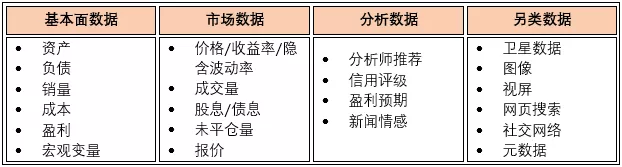

接下来我们详细讨论它们的特征以及应用。

## 基本面数据


基本面数据 (Fundamental Data) 通常是会计数据  (accounting data)，包括资产 (assets)、负债 (liabilities)、销量 (sales) 和盈利 (earnings) 等等，来源于按季度发布的财务报告。



下图展示了苹果第二季度的财务报表中的部分基本面数据(销量、销售成本、运营费用等等)。

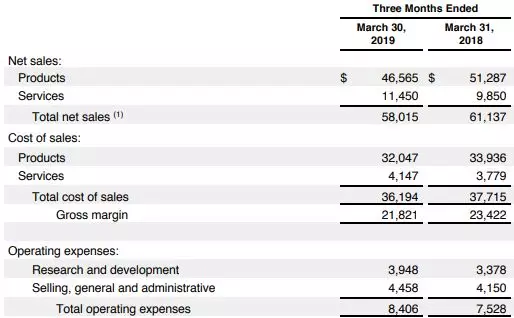

# 「2. 从 Tick 到 Bar」
https://mp.weixin.qq.com/s?__biz=MzIzMjY0MjE1MA==&mid=2247487516&idx=1&sn=1798fae691a201e82fc6e344764453ec&chksm=e8909315dfe71a03a9ebc16de053560deaaabeb32a07543ba34539f55b4c343dad52333370fe&scene=21#wechat_redirect

## Tick 数据
Tick 不是下左图中的水滴答的声音，而是下右图中某种金融产品交易时的逐笔数据。

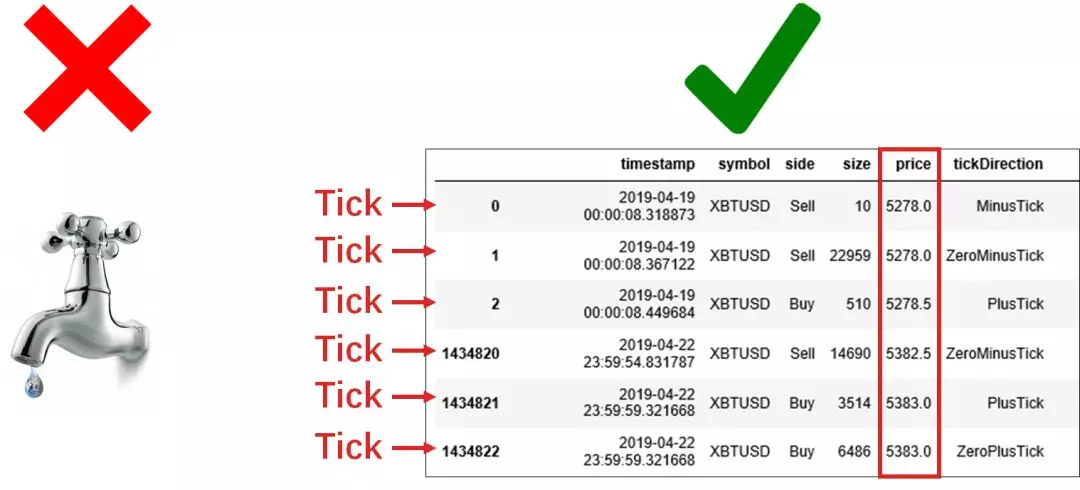


## 总结


本节主要将如果从 tick 数据抽样到 bar 数据，大方向上有两种方法：



标准法：等时抽样、等笔抽样、等量抽样、等额抽样



信息驱动法：



Imbalance 抽样，满足条件

|Imbalance| ≥ Expected Imbalance



Runs 抽样，满足条件

|Run| ≥ Expected Run



道理不难，但真正实操起来坑很多，比如：



数据量太大，运行时间太长。



画出来的图和 Prado 书上不太一样 (看不出 dollar bar 最稳定)，光看图不行，还需要用具体的统计指标来证明 dollar bar 最稳定。



抽样 IB 和 RB 需要超参数，这些参数怎么改没有一个明确的规则，我也是慢慢试出来的，而且发现每次抽样的结果对超参数非常敏感。



哎，慢慢填吧，难才好玩，难而且被功课了才有价值。

# 「3. 基于事件采样」
https://mp.weixin.qq.com/s/X6ZQFvXpxTZB905p0uNTVA  
在上贴〖从 Tick 到 Bar〗里，我们已经会从「异质」的 tick 数据采样出「同质」的 bar 数据。当数据太多时，传统 (非深度) 机器学习算法的表现会有上限，如下图的红线所示。

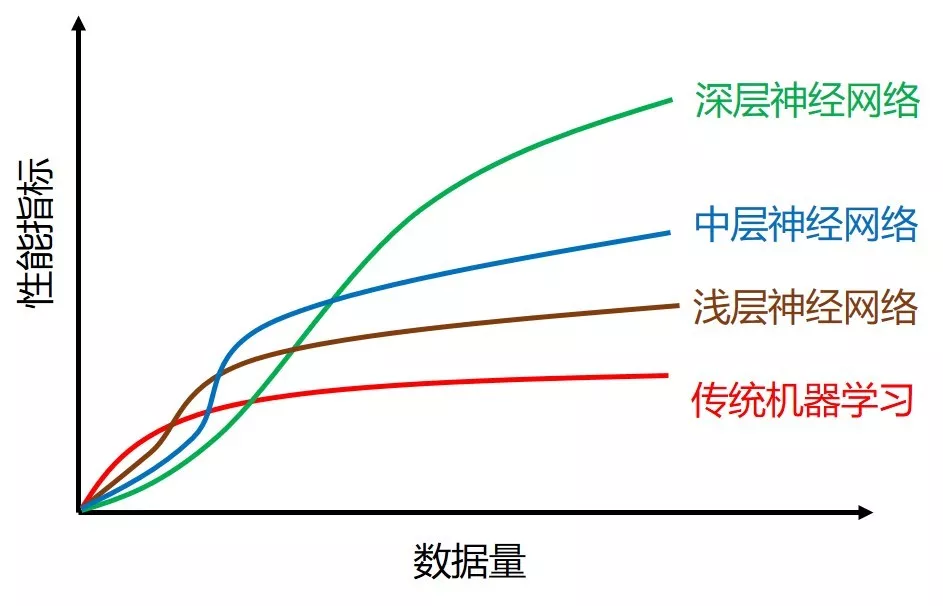

这时减少数据量并发掘出更好特征的数据才能使机器学习算法取得好效果。通常有两种方法：


* 无脑型下采样(downsampling)
* 基于事件采样(event-based sampling)



第一种又可细分为线性等分采样(linspace sampling) 和均匀采样(uniform sampling)。它们虽然可以做到减少数据量，但是采样数据的方法都没有金融含义支撑，线性等分采样过于简单，均匀采样过于随机。 因此本帖来看看第二种基于事件采样，即背后有金融含义支撑的采样方法。

想想投资组合经理买卖是不是通常发生在特定事件发生后，如


* 结构性突破 (structural break)：均值回归模式 → 动量模式
* 市场微观结构 (market microstructure )：FIX 信息



这些事件通常伴随着下面三种场景


* 宏观统计数据公布
* 波动率急剧增加
* 价格大幅偏离均衡水平



本帖内容很简单，只围绕着一个公式展开。但困难的是当我用标普 500 价值股 ETF的高频 tick 的数据的时候，做了很多数据处理的工作。这些很麻烦但又非常重要，因此我也想将这个处理数据的完整过程记录下来，防止以后再踩坑。



首先引入 datetime, numpy, pandas, matplotlib, seaborn 等必要的包，并定义我最喜欢的一些颜色 (看过我盘一盘 Python 系列的读者应该知道我的喜好 )* 

## 总结


处理数据永远是最花精力和时间的，机器学习是，量化金融也是，数据科学更是。你获取的源数据格式和你想用的格式总是差别很远，务必在处理数据上下功夫，要不然胡乱使用一通模型只会 __Garbage In Garbage Out__。



我们已经学会了如何从「非结构性」的杂乱金融数据转换成同质的「结构性」的数据，但是直接把它们丢进机器学习 (ML) 模型中还是会出问题的，原因有二：

 
一些 ML 模型，比如支撑向量机 (Support Vector Machine, SVM)，随样本量变化的表现不稳定。


ML 模型在输入好的特征后，得到的精度才最佳。

 

为了让 ML 模型表现稳和精度高，我们需要更聪明的采样方法，基于事件采样就是其中之一。



要能更深入了解基于事件采样，我们可能要等到读完 AMFL 的第 17-19 章了：

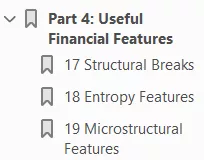